In [1]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F

In [2]:
obs = np.load('obs.npy')
acts = np.load('actions.npy')

In [3]:
input_space = obs.shape[1]

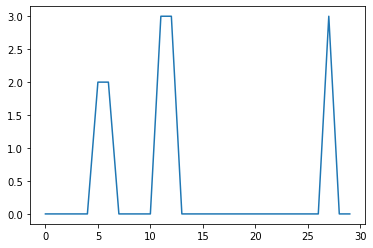

In [4]:
plt.plot(acts[:30])

In [5]:
class Net(nn.Module):

    def __init__(self, input_shape):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_shape, 164)  
        self.fc2 = nn.Linear(164, 64)
        self.fc3 = nn.Linear(64, 3)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [6]:
net = Net(input_space)

In [7]:
net

Net(
  (fc1): Linear(in_features=128, out_features=164, bias=True)
  (fc2): Linear(in_features=164, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=3, bias=True)
)

In [8]:
from sklearn.preprocessing import OneHotEncoder

In [9]:
enc = OneHotEncoder()

In [10]:
labels = enc.fit_transform(acts.reshape(-1, 1))

In [11]:
labels = labels.todense()

In [12]:
criterion = nn.CrossEntropyLoss()

In [13]:
gpu_available = torch.cuda.is_available()
device_name = 'cuda' if gpu_available else 'cpu'
device = torch.device(device_name)
print(f'Using {device_name}')

Using cpu


In [14]:
acts = list(map(lambda x: x-1 if x>0 else 0, list(acts)))

In [15]:
obs = torch.tensor(obs, dtype=torch.float)
labels = torch.tensor(acts, dtype=torch.long)

In [16]:
labels

tensor([0, 0, 0,  ..., 0, 0, 0])

In [17]:
labels.shape

torch.Size([1250])

In [18]:
labels

tensor([0, 0, 0,  ..., 0, 0, 0])

In [19]:
import torch.optim as optim

# create your optimizer
optimizer = optim.Adam(net.parameters())

In [20]:
def train_loop():
    # in your training loop:
    optimizer.zero_grad()   # zero the gradient buffers

    output = net(obs)
    loss = criterion(output, labels)
    loss.backward()
    optimizer.step()
    return loss.item()

In [21]:
losses = []

In [22]:
for _ in range(200):
    loss_ = train_loop()
    losses.append(loss_)

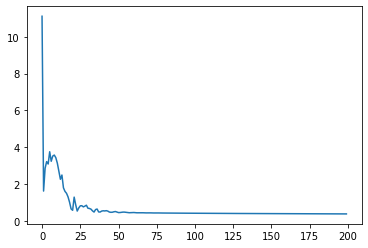

In [23]:
plt.plot(losses)

In [25]:
model_path = 'model_weights'
torch.save(net.state_dict(), model_path)

In [26]:
import gym

import torch
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):

    def __init__(self, input_shape):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_shape, 164)
        self.fc2 = nn.Linear(164, 64)
        self.fc3 = nn.Linear(64, 3)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


env = gym.make("Pong-ram-v4")
observation = env.reset()
print(observation.shape)
model_path = 'model_weights'

model = Net(observation.shape[0])
model.load_state_dict(torch.load(model_path))
model.eval()

(128,)


Net(
  (fc1): Linear(in_features=128, out_features=164, bias=True)
  (fc2): Linear(in_features=164, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=3, bias=True)
)

In [57]:
np.random.randint(10, size=128)

array([5, 4, 5, 9, 2, 9, 1, 7, 0, 1, 9, 2, 1, 2, 3, 7, 6, 7, 4, 8, 0, 1,
       7, 6, 8, 8, 8, 8, 1, 1, 4, 7, 5, 2, 6, 9, 0, 3, 3, 2, 0, 0, 4, 8,
       0, 9, 9, 4, 5, 3, 8, 5, 4, 4, 8, 7, 5, 7, 6, 0, 1, 0, 9, 2, 9, 1,
       2, 4, 2, 3, 7, 4, 4, 2, 0, 5, 5, 6, 6, 0, 5, 5, 5, 2, 9, 5, 1, 1,
       3, 7, 4, 5, 1, 6, 8, 7, 3, 7, 0, 5, 3, 6, 1, 2, 7, 5, 5, 7, 9, 6,
       1, 6, 2, 0, 0, 3, 6, 1, 0, 4, 9, 8, 0, 7, 8, 3, 2, 8])

In [58]:
obs_input = torch.Tensor(np.random.randint(10, size=128))
out = model(obs_input).detach().numpy()

0

In [ ]:
out